# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell is a startup aiming to tap the potential in this market. The objective is to build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros



## Importing necessary libraries

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Loading the dataset

In [383]:
# Read in the data and print the data head
data = pd.read_csv('used_device_data.csv')
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [384]:
# Print the data tail
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


## Data Overview

In [385]:
# Print the data shape
data.shape

(3454, 15)

#### Observations

* There are 3454 rows and 15 columns in the data

In [386]:
# Print the summary of data info
data.info()

#### Observations
*  Data types include object, float, and int.
*  Some of the rows of data differ from the total amount of rows indicating that there is missing data.

#### Duplicate Value Check

In [ ]:
# Print the sum of duplicate values
data.duplicated().sum()

#### Observations
* There are no duplicates.

#### Missing Value Check

In [ ]:
# Print a summary table of missing values in the data
data.isnull().sum()

#### Observations
* There are several missing rows of data in the selfie_camera_mp, int_memory, ram, battery, and weight columns.  
* There are 179 missing rows in the main_camera_mp column.

In [ ]:
# Print a summary of the descriptive statistics of the data
data.describe().T

#### Observations
* **screen_size**: the average screen size is 13.7 cm with a range of 5.1-30.7 cm.
* **main_camera_mp**: the mp range from 0.08-48 mp with an average of 9.5 mp.  
* **selfie_camera_mp**: the mp range from 0-32 mp with an avearge of 6.6 mp. The range and max are smaller than the main camera mp.
* **int_memory**: the average is 54 GB and the data range from 0.01-1024 GB.  The median is higher than the mean indicating that the data may be left skewed.
* **ram**: the data range from 0.02-12 GB with an average of 4 GB.  The mean and median are similar indicating the data may be symmetrically distributed.
* **battery**: the average battery takes 3133.4 min to fully discharge with a range of 500-9720 min.
* **weight**: the weight ranges from 69-855 grams with an average of 3133 grams.
* **release_year**: the devices come from the years 2013-2020 with the average lying somewhere in the year 2015.  The data may be symmetrically distributed since the mean and median are similar.
* **days_used**: the days used range from 91-1094 days with an average of 675 days.  
* **normalized_used_price**: the average price is 4.36 euros and range from 1.54-6.62 euros.  The data may be symmetrically distributed since the mean and median are close in value.
* **normalized_new_price**: the new prices ragne from 2.90-7.85 euros with an average of 5.23 euros.  The mean and median are similar indicating the data may be symmetric.    
    

## Exploratory Data Analysis (EDA)

## Univariate Analysis

### Numerical Variables



#### Screen Size

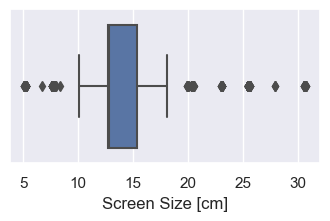

In [390]:
# Boxplot of screen size
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=data, x='screen_size')
plt.xlabel('Screen Size [cm]')
plt.show()

#### Observations
* There are many outliers present on the low and high end of the data.
* The data may be right skewed.
* Excluding the outliers, the data range from about 10-18 cm with a median around 12.5 cm.  

#### Camera Megapixels

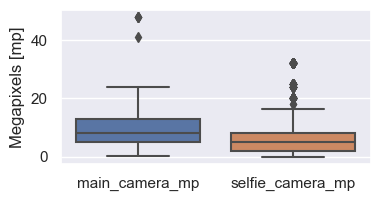

In [391]:
# Create new data frame with camera megapixels
df_mp = data[['main_camera_mp', 'selfie_camera_mp']]

# Boxplot of camera megapixels
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=df_mp)
plt.ylabel('Megapixels [mp]')
plt.show()

#### Observations
* **Main Camera mp**
    * There are two outliers present from 40-50 mp.
    * Excluding the outliers 100% of the data contain <25 mp.  
    * The data appear to be right skewed.
    * The median is around 12 mp.
* **Selfie Camera mp**
    * There are several outliers present on the higher end of the data (>15 mp).  
    * Overall, the selfie camera contains less mp than the main camera.
    * 100% of the selfie cameras contain <20 mp.
    * The data may be right skewed.
    * The median is around 5 mp.

#### Memory and RAM

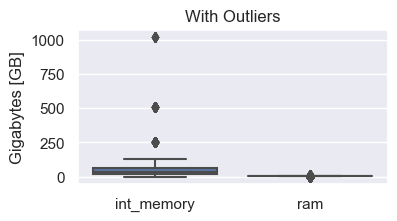

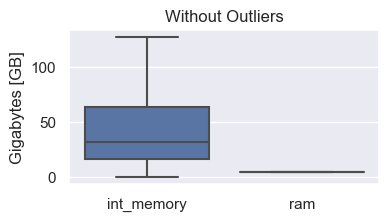

In [392]:
# Create new data frame with storage
df_storage = data[['int_memory', 'ram']]

# Boxplot of storage and ram with outliers
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=df_storage)
plt.title('With Outliers')
plt.ylabel('Gigabytes [GB]')
plt.show()

# Boxplot of storage and ram with outliers removed
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=df_storage, showfliers=False)
plt.title('Without Outliers')
plt.ylabel('Gigabytes [GB]')
plt.show()

#### Observations
* **Internal Memory**
    * The data appear to be right skewed.  
    * There are three outliers present on the high end of the data.
    * Excluding the outliers, 100% of the data contain <200 GB of storage.
* **RAM**
    * The data have a very narrow range from 0.02-12 GB
    * There are outliers present but it is difficult to tell how many

#### Battery

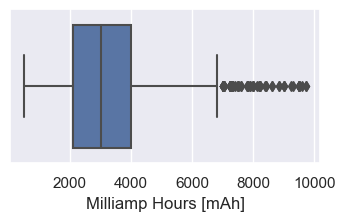

In [393]:
# Boxplot of device battery
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=data, x='battery')
plt.xlabel('Milliamp Hours [mAh]')
plt.show()

#### Observations
* There are many outliers present on the high end > ~7000 mAh of the data.  
* Excluding the outliers the data range from ~500-7000 mAh with a median ~3000 mAh.
* The data appear to be right-skewed.
* At least 75% of devices discharge at >2000 mAh.

#### Weight

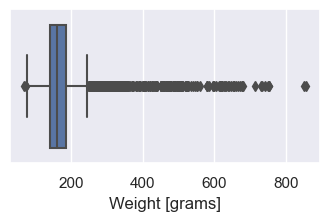

In [394]:
# Boxplot of device weight
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=data, x='weight')
plt.xlabel('Weight [grams]')
plt.show()

#### Observations
*  There are more outliers present on the heavier weight end of the data.
*  Excluding outliers the data appear to be symmetrically distributed with mean ~150 g with a range ~90-250 g.

#### Release Year

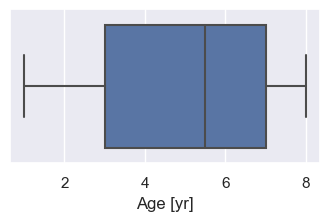

In [395]:
# Convert variable from categorial to numerical
df_device_age = 2021-data['release_year']

# Boxplot of device age in years
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(x=df_device_age)
plt.xlabel('Age [yr]')
plt.show()

#### Observations
* The age of the devices range from 0-7 years.  The median is about 4.5 years.  
* The data are left skewed.

#### Days Used

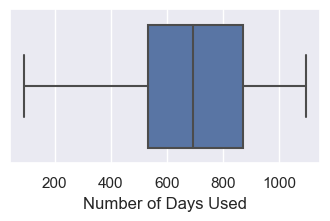

In [397]:
# Boxplot number of days the device has been used
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=data, x='days_used')
plt.xlabel('Number of Days Used')
plt.show()

#### Observations
* The number of days used range from ~100-1100 days with the median ~700 days.  
* The data are left skewed.
* 75% of the devices have been used more than 500 days.

#### Normalized New and Used Price

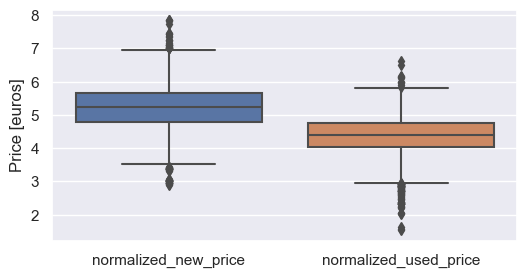

In [398]:
# Create new dataframe for new and used price
df_price = data[['normalized_new_price', 'normalized_used_price']]

# Boxplot of normalized new and used price
sns.set(rc={"figure.figsize":(6, 3)})
sns.boxplot(data=df_price)
plt.ylabel('Price [euros]')
plt.show()

#### Observations

- **Normalized New Price**
  - There are outliers present on the low and high ends of the data.
  - Outliers excluded, the data are distributed symmetrically.  The data range from ~3.5\-7 euros with a median ~5.3 euros.
- **Normalized Used Price**
  - All the data are priced under 7 euros.
  - There are many outliers present on the low and high end of price.
  - Excluding the outliers the data are symmetrically distributed.
  - Excluding the outliers the data range from ~3\-5.9 euros with median of 4.5 euros.
  - The range of prices for a new device of the same model have a higher range than the used price.

### What does the distribution of used device prices look like?

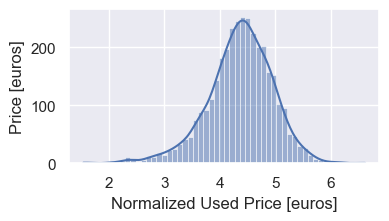

In [399]:
# Plot a histogram with kde of the normalized used price in euros
sns.set(rc={"figure.figsize":(4, 2)})
sns.histplot(data=data, x='normalized_used_price', kde=True)
plt.xlabel('Normalized Used Price [euros]')
plt.ylabel('Price [euros]')
plt.show()

#### Observations

*  The data are approximately normally distributed.
*  There may be a slight left skew.



## Categorical Variables



### Brand Name

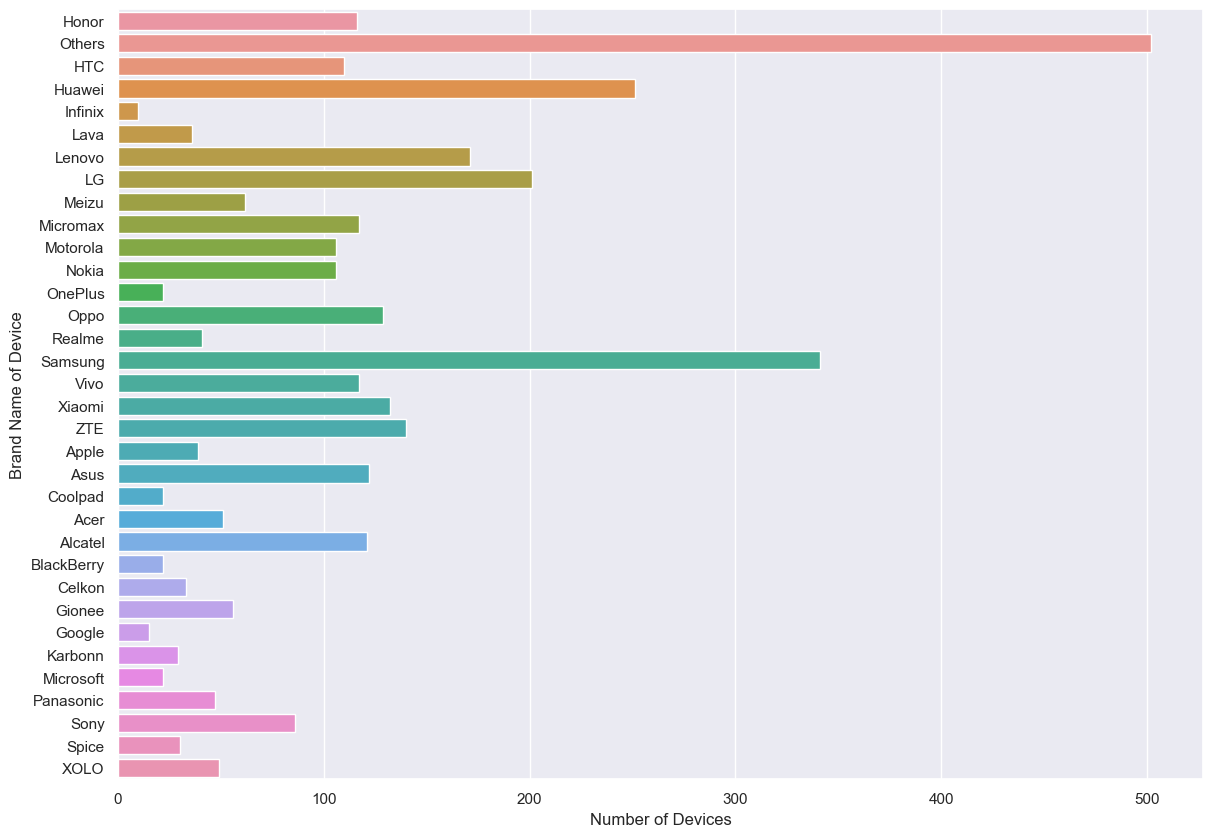

In [400]:
# Count plot of brand name
sns.set(rc={"figure.figsize":(14, 10)})
sns.countplot(data=data, y='brand_name')
plt.xlabel('Number of Devices')
plt.ylabel('Brand Name of Device')
plt.show()

In [401]:
# Print the number of unique brand names
data['brand_name'].nunique()

34

In [402]:
# Sort the count of brand names in descending order
data['brand_name'].value_counts().sort_values(ascending=False)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

#### Observations

- There are 34 unique brand names.
- The brand names Others, Samsung, and Huawei have the most devices available.
- The lowest number of devices available include include OnePlus, Google, and Infinix.



### Operating System



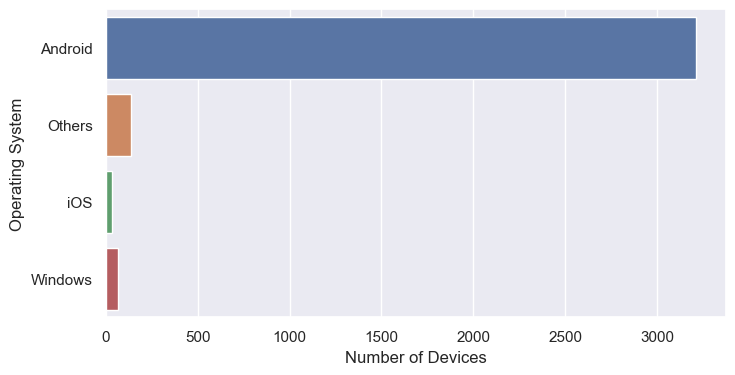

In [403]:
# Count plot of operating system available on devices
sns.set(rc={"figure.figsize":(8, 4)})
sns.countplot(data=data, y='os')
plt.xlabel('Number of Devices')
plt.ylabel('Operating System')
plt.show()

In [404]:
# Sort the operating systems in descending order
data['os'].value_counts().sort_values(ascending=False)

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

### What percentage of the used device market is dominated by Android devices?

In [405]:
# Determine the percentage of Android users in the used market
android_perc = ((data['os'].value_counts()['Android'])/data.shape[0])*100

# Print the percentage of Android users in the used market
print('' + str(np.round(android_perc, decimals=1)) + '% of the used device market is dominated by Android devices.')

93.1% of the used device market is dominated by Android devices.


#### Observations

- The most popular operating system is Android on 3,214 devices, followed by Others on 137 devices, Windows on 67 devices, and iOS on 36 devices.
- 93.1% of the used device market is dominated by Android devices.

### 4g or 5g

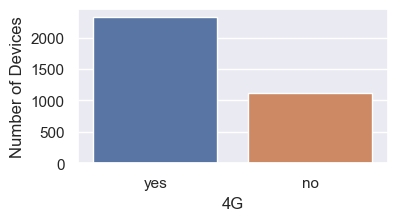

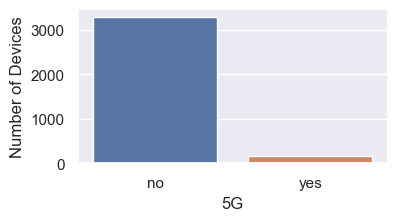

In [406]:
# Count plot of 4g devices
sns.set(rc={"figure.figsize":(4, 2)})
sns.countplot(data=data, x='4g')
plt.xlabel('4G')
plt.ylabel('Number of Devices')
plt.show()

# Count plot of 5g devices
sns.set(rc={"figure.figsize":(4, 2)})
sns.countplot(data=data, x='5g')
plt.xlabel('5G')
plt.ylabel('Number of Devices')
plt.show()

In [407]:
# Count the number of devices that have 4g
data['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

In [408]:
# Count the number of devices that have 5g
data['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

#### Observations
* 67% of the devices have 4G and the other 33% do not.
* 95% of devices do not have 5G and 5% of devices do.
* More devices have 4G than 5G.

## Bivariate Analysis



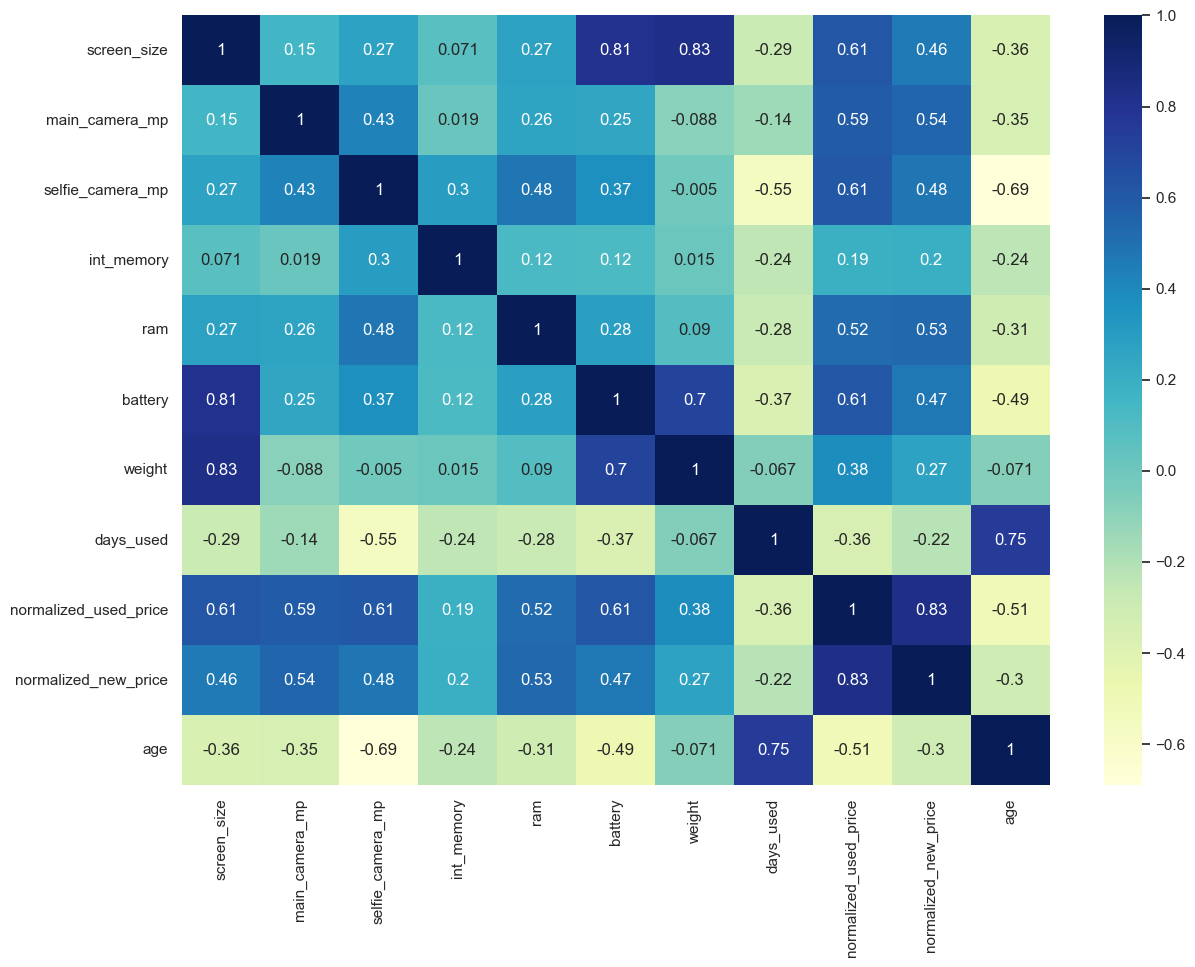

In [409]:
# Create a dataframe with only numerical variables
df_numvar = data.drop(columns=['brand_name', 'os', '4g', '5g', 'release_year'])

# Convert release year to numerical variable by computing the age
df_numvar['age'] = 2021-data['release_year']

# Correlation heat map of the numerical variables
sns.set(rc={"figure.figsize":(14, 10)})
sns.heatmap(data=df_numvar.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Correlation Coefficients
To interpret the correlation coefficient the following criteria are used from Hinkle, Wiersma, and Jurs (2003)$^1$:
* 0.9 to 1.0 (-0.9 to -1.0): very high positive (negative) correlation
* 0.7 to 0.9 (-0.7 to -0.9): high positive (negative) correlation
* 0.5 to 0.7 (-0.5 to -0.7): moderate positive (negative) correlation
* 0.3 to 0.5 (-0.3 to -0.5): low positive (negative) correlation
* 0.0 to 0.3 (0.0 to -0.3): negligible correlation

#### Observations

* **Screen size** and **weight** show a high positive correlation (0.83)
  * *Interpretation*:  This makes sense because larger phones are usually heavier.
* **Normalized New** and **Normalized Used Price** show a high positive correlation (0.83)
  * *Interpretation*: If the price of a new device is high then the same device, but used, will likely have a higher price too.
* **Battery** and **Screen Size** show a high positive correlation (0.81)
  * Interpretation: A larger device is equipped with a battery with a higher capacity.
* **Days Used** and **Age** show a high positive correlation (0.75)
  * *Interpretation*: This makes sense because an older device has likely been used more.
* **Battery** and **Weight** show a moderate/high positive correlation (0.7)
  * *Interpretation*:  A larger phone should have a battery with higher capacity which weighs more.
* **Screen size** and **Normalized Used Price** are moderately positive correlation (0.61).
  * *Interpretation*: It makes sense that as price increases the screen size increases since larger phones are more expensive, in general.
* **Selfie Camera mp** and **Normalized Used Price** are moderately positively correlated (0.61).
  * *Interpretation*: In general, a higher resolution camera is associated with a higher price.
* **Battery** and **Normalized Used Price** are moderately positively correlated (0.61).
  * *Intepretation*:  A higher battery capacity is usually associated with a larger phone and thus a higher price.
* **Days Used** and **Selfie Camera mp** are moderately negatively correlated (-0.55).  
  * *Intepretation*: The number of days used correlates highly with the age of the phone.  In the bivariate analysis it is shown that the selfie camera mp decreased with increasing age of the phone.  So this correlation makes intuitive sense.
* **Selfie Camera mp** and **Age** show a strong negative correlation (-0.69)
  * *Interpretation*: The selfie cameras on older devices contain less megapixels which makes sense because newer devices tend to have higher resolution.

### Which attributes are highly correlated with the normalized price of a used device?

**Normalized Used Price**
* highly positively correlated with normalized new price (0.83)
* moderately positively correlated with screen size (0.61)
* moderately postively correlated with main camera megapixels (0.59)
* moderately positively correlated with RAM (0.52)
* moderatley negatively correlated with age (-0.51)

**Normalized New Price**
* highly positively correlated with normalized new price (0.83)
* moderately positively correlated with main camera megapixels (0.54)

### Screen Size versus Release Year

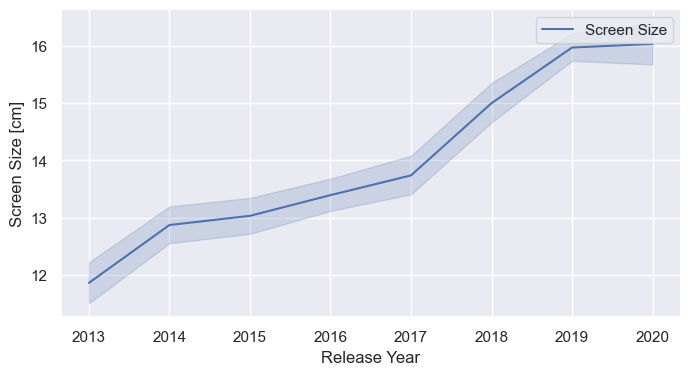

In [410]:
# Lineplot to demonstrate how screen size has changed over time
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'screen_size', label='Screen Size')
plt.xlabel('Release Year')
plt.ylabel('Screen Size [cm]')
plt.show()

#### Observations
* Screen size has increased over the years from 2013-2020.

### Main and Selfie Camera versus Release Year

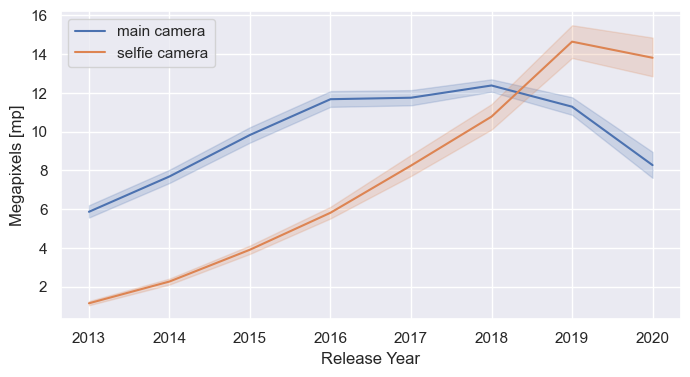

In [411]:
# Lineplot comparing main and selfie camera mp over the years
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'main_camera_mp',   label='main camera'  )
sns.lineplot(data=data, x = 'release_year',  y = 'selfie_camera_mp', label='selfie camera')
plt.xlabel('Release Year'   )
plt.ylabel('Megapixels [mp]')
plt.show()

#### Observations
* Main camera resolution increased over the years 2013-2018 from 6 to 12 megapixels [mp] but then decreased from 2018 to 2020.
* Selfie camera resolution drastically increased over the years 2013 to 2019 from under 2 mp to over 14 mp, but then decreased slightly from 2019 to 2020.

### Internal Memory and RAM versus Release Year

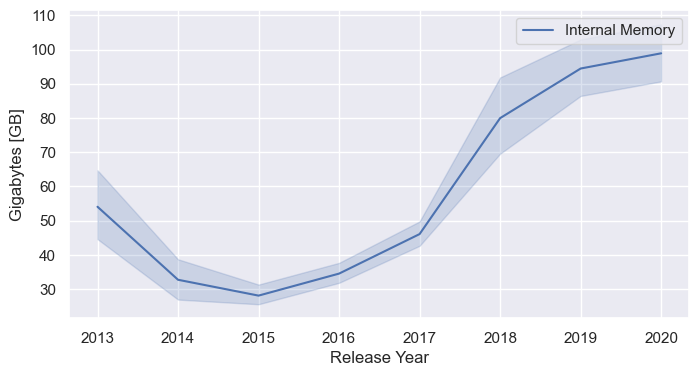

In [412]:
# Lineplot of Internal Memory over the years
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'int_memory', label='Internal Memory')
plt.xlabel('Release Year')
plt.ylabel('Gigabytes [GB]')
plt.show()

#### Observations
* The amount of internal memory starting at around 50 GB decreased over the years 2013-2015 then increased to over 90 GB by the year 2020.

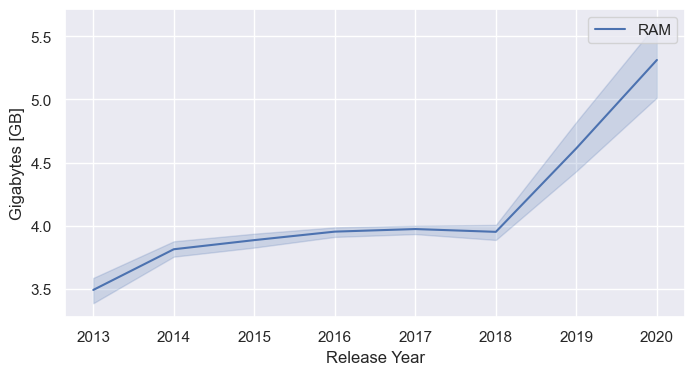

In [413]:
# Lineplot of RAM over the years
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'ram', label='RAM')
plt.xlabel('Release Year')
plt.ylabel('Gigabytes [GB]')
plt.show()

#### Observations
* The amount of RAM [GB] increased slowly, at less than 3.5 GB in 2013, over the years 2013 to 2018, then it drastically increased from 2018 to 2020 to over 5 GB by 2020.

### Battery Capacity over the Years

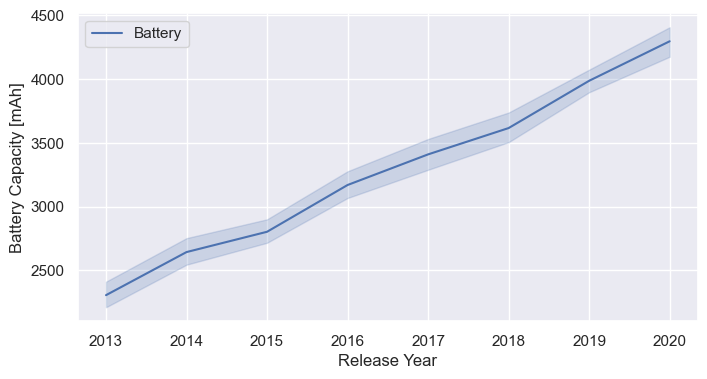

In [414]:
# Lineplot comparing battery capacities over the years
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'battery', label='Battery')
plt.xlabel('Release Year')
plt.ylabel('Battery Capacity [mAh]')
plt.show()

#### Observations
* The battery capacity increased approximately linearly over the years 2013 to 2020.

### Weight of Device versus Release Year

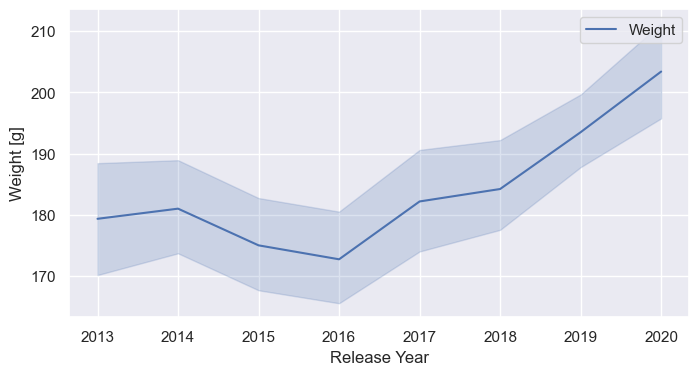

In [415]:
# Lineplot to compare device weight over the years
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'weight', label='Weight')
plt.xlabel('Release Year')
plt.ylabel('Weight [g]')
plt.show()

#### Observations
* The device weight decreased from ~180 grams to ~175 grams over the years 2013 to 2016 but then steadily increased in weight to over 200 grams by 2020.

### Days Used versus Release Year

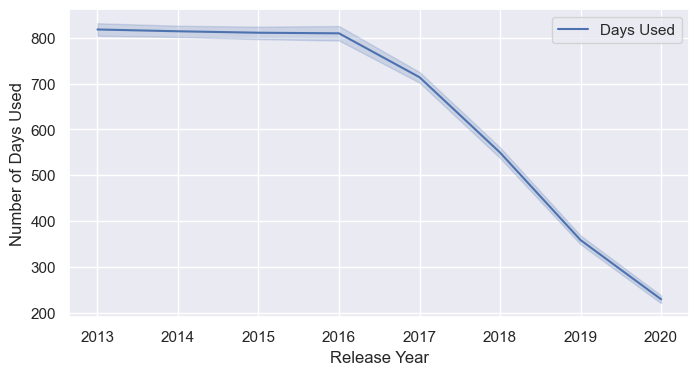

In [416]:
# Lineplot comparing the days used to release year
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'days_used', label='Days Used')
plt.xlabel('Release Year')
plt.ylabel('Number of Days Used')
plt.show()

#### Observations
* The number of days used remain fairly steady over the years 2013 to 2016 but then decreases from 2016 to 2020.
* This makes sense because a newer device would, in general, be used for less days versus an older device.

### Normalized Use and New Price versus Release Year

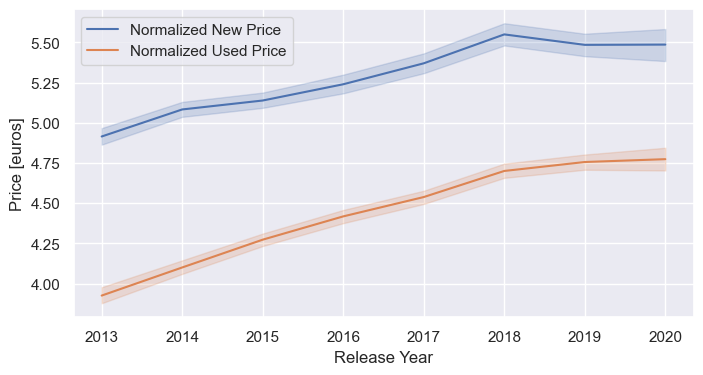

In [417]:
# Lineplot to show prices over the years
sns.set(rc={"figure.figsize":(8, 4)})
sns.lineplot(data=data, x = 'release_year',  y = 'normalized_new_price',  label='Normalized New Price')
sns.lineplot(data=data, x = 'release_year',  y = 'normalized_used_price', label='Normalized Used Price')
plt.xlabel('Release Year')
plt.ylabel('Price [euros]')
plt.show()

#### Observations
* Both new and used prices have increased steaadily over the years 2013-2020.
* The new prices are overall higher than the used prices, as expected.

### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?



In [418]:
# Separate the rows of data where the batteries are >4500 mAh
battery_4500 = data[data['battery'] > 4500]
battery_4500.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001


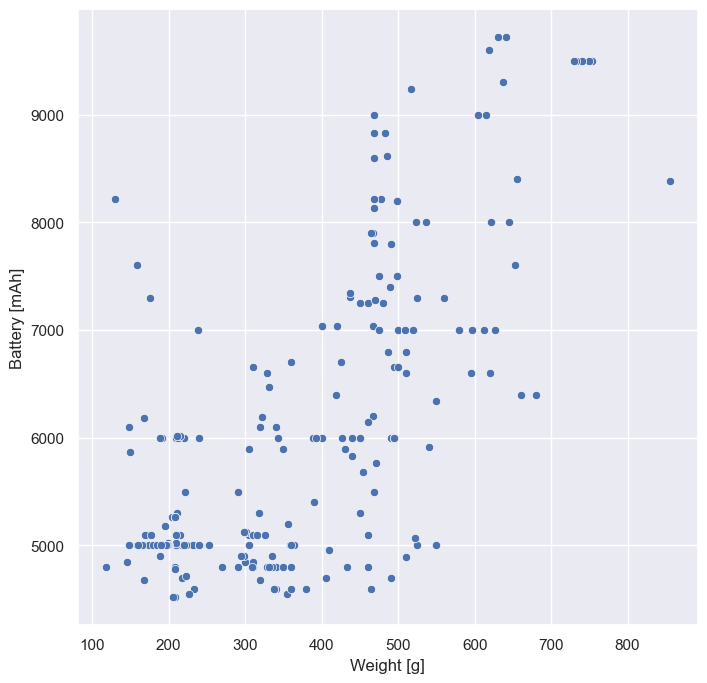

In [419]:
# Scatterplot of battery verus weight
sns.set(rc={"figure.figsize":(8, 8)})
sns.scatterplot(data=battery_4500, x='weight', y='battery')
plt.xlabel('Weight [g]')
plt.ylabel('Battery [mAh]')
plt.show()

#### Observations
*  As the battery capacity increased the weight of the device increased.

### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [420]:
# Convert inches to cm 
in_cm = 6*2.54

# Separate the data for screen size larger than 6 inches
screen_size = data[data['screen_size'] > in_cm]

# Determine the number of different brand names with screen size >6 inches
num_six = screen_size['brand_name'].count()

# Print the number of phones/tablets available across different brands with screen size > 6 in.
print('There are ' + str(num_six) + ' phones and tablets available across different brands with screen size larger than 6 inches.' )

There are 1099 phones and tablets available across different brands with screen size larger than 6 inches.


#### Observations
* There are 1099 phones and tablets available across different brands with screen size larger than 6 inches.

### A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

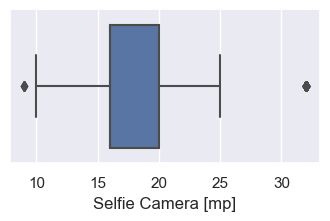

In [421]:
# Separate the greater than 8 mp selfie cameras
selfie_8mp = data[data['selfie_camera_mp'] > 8]
selfie_8mp.head()

# Boxplot of selfie cameras with 8 mp or greater
sns.set(rc={"figure.figsize":(4, 2)})
sns.boxplot(data=selfie_8mp, x='selfie_camera_mp')
plt.xlabel('Selfie Camera [mp]')
plt.show()

#### Observations
* There are two outliers
* Excluding the outiers, the data range from 10-25 megapixels
* 75% of the data contain more than 15 megapixels

### Price of 4g versus 5g?

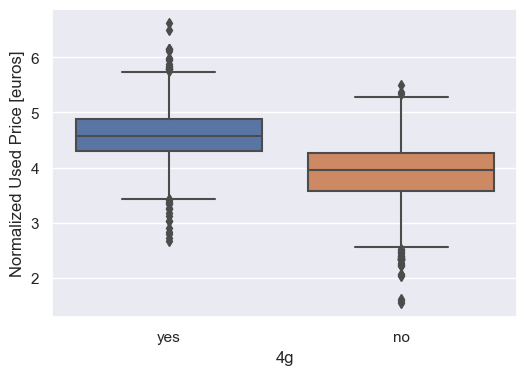

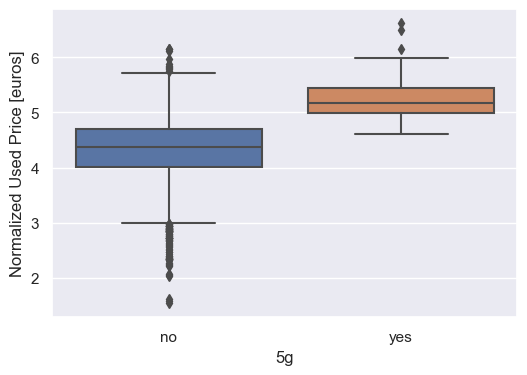

In [422]:
# Boxplot of prices for 4g devices
sns.set(rc={"figure.figsize":(6, 4)})
sns.boxplot(data=data, x='4g', y='normalized_used_price') 
plt.xlabel('4g')
plt.ylabel('Normalized Used Price [euros]')
plt.show()

# Boxplot of prices for 5g devices
sns.set(rc={"figure.figsize":(6, 4)})
sns.boxplot(data=data, x='5g', y='normalized_used_price') 
plt.xlabel('5g')
plt.ylabel('Normalized Used Price [euros]')
plt.show()

#### Observations
* There are outliers present.
* Normalized used prices are higher for 4g devices versus devices that do not have 4g.
* For 5g, prices are higher for devices that have it, but there is a wider range of prices for devices that do not have it.
* Devices that have 5g have the narrowest range of prices from ~4.5 to over 6 euros.
* Excluding outliers, all the data appear normally distributed. 

### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

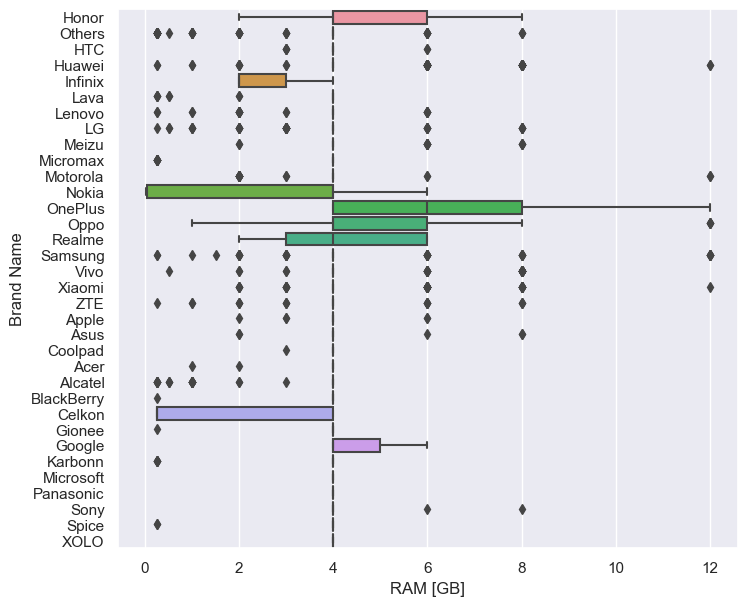

In [423]:
# Box plot of the ram as it relates to brand name
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x='ram', y='brand_name')
plt.xlabel('RAM [GB]')
plt.ylabel('Brand Name')
plt.show()

#### Observations
* There are outliers present.
* There are less data points as the RAM increases.
* OnePlus has some of the highest RAM since 100% of the data is $\geq$ 4 GB.
* Most brands have a median of 4 GB of RAM.

### How does each brand vary in normalized used price?

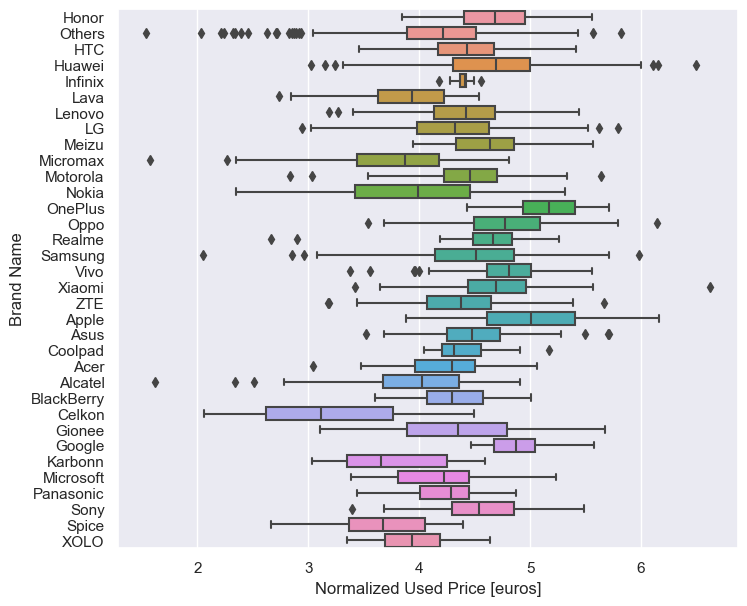

In [424]:
# Boxplot of prices within each brand of device
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x='normalized_used_price', y='brand_name') 
plt.xlabel('Normalized Used Price [euros]')
plt.ylabel('Brand Name')
plt.show()

#### Observations
* There are outlier present.
* Apple, OnePlus, and Google have some of the highest median used prices.
* Celkon has the lowest median price.

### What brands are selling for the highest normalized new prices?

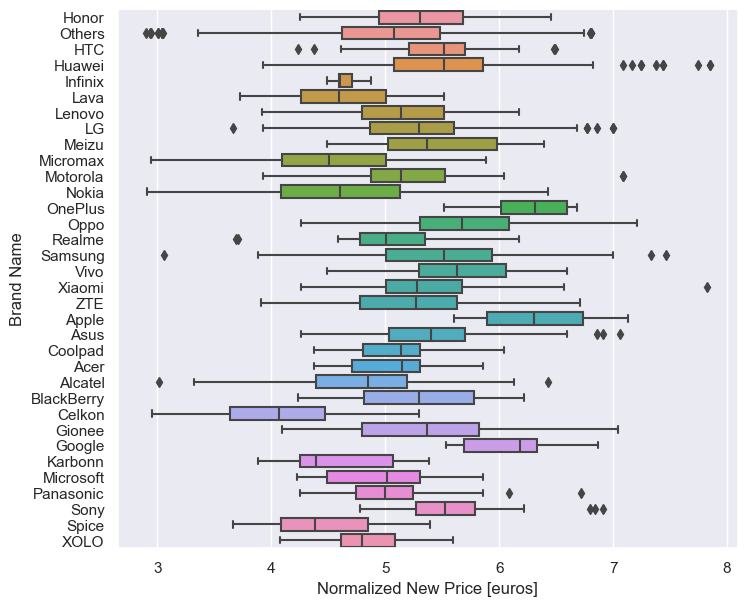

In [425]:
# Boxplot of new prices within each brand of device
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x='normalized_new_price', y='brand_name') 
plt.xlabel('Normalized New Price [euros]')
plt.ylabel('Brand Name')
plt.show()

#### Observations
* Apple, Google, and OnePlus sell for some of the highest normalized new prices.
* The median prices for Apple, Google, and OnePlus are higher than the medians of the other brands and their ranges are concentrated at the higher priced end compared to other brands.

### What brands have the highest resolution cameras?

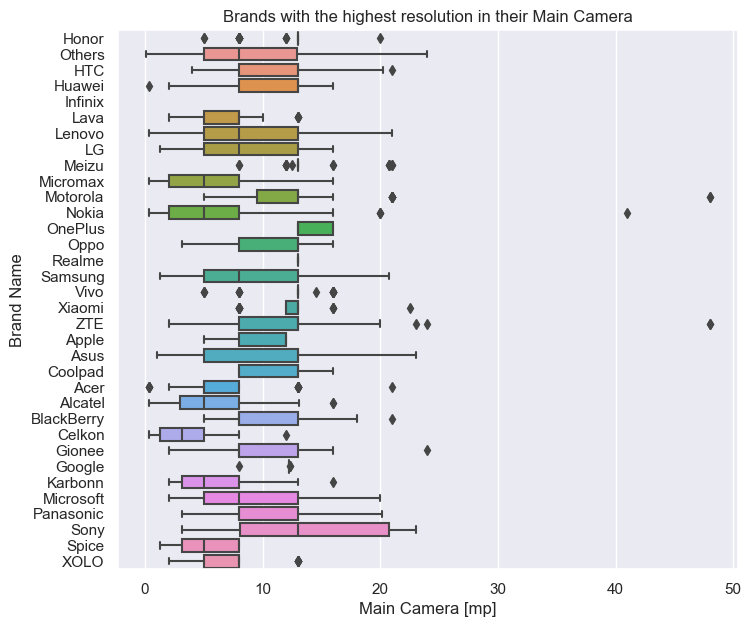

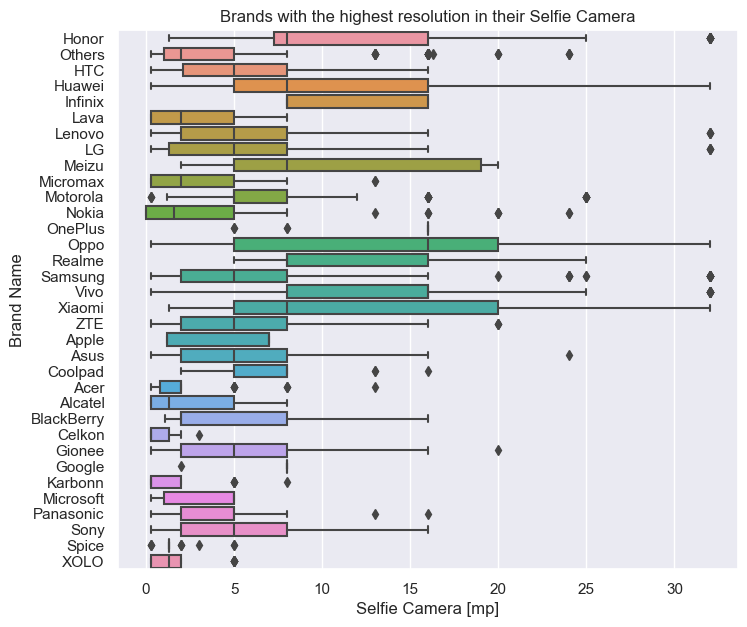

In [426]:
# Boxplot of prices within each brand of device
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x='main_camera_mp', y='brand_name') 
plt.title('Brands with the highest resolution in their Main Camera')
plt.xlabel('Main Camera [mp]')
plt.ylabel('Brand Name')
plt.show()


# Boxplot of prices within each brand of device
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x='selfie_camera_mp', y='brand_name')
plt.title('Brands with the highest resolution in their Selfie Camera')
plt.xlabel('Selfie Camera [mp]')
plt.ylabel('Brand Name')
plt.show()

#### Observations
* There are some outliers present.
* OnePlus and Sony have some of the highest resolutions in thier main cameras compared to other brands.
* OnePlus and Oppo have higher median resolutions in thier selfie cameras compared to the other brands.

### How does weight of device compare across brands?

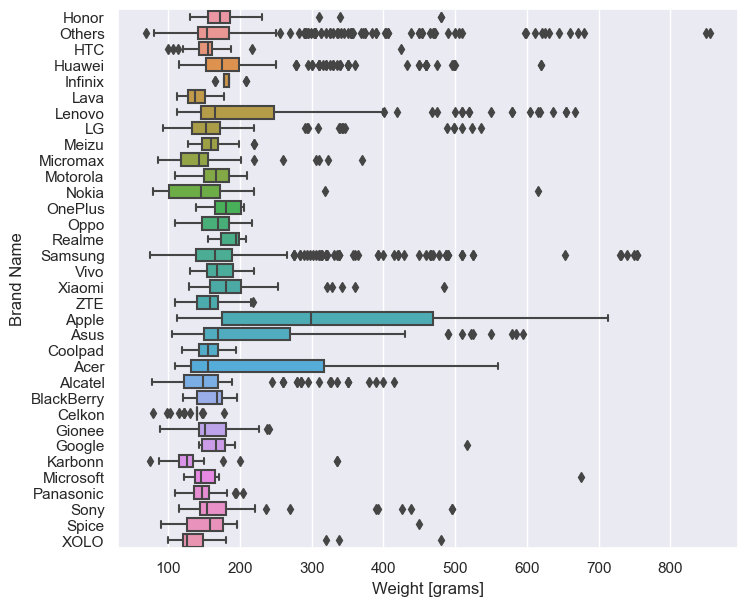

In [427]:
# Boxplot of weight within each brand of device
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x='weight', y='brand_name')
plt.xlabel('Weight [grams]')
plt.ylabel('Brand Name')
plt.show()

#### Observations
* There are many outliers.
* Apple has some of the heaviest devices with a median weight greater than 50% of the weight of all other brands.

### How old are the devices from each brand?

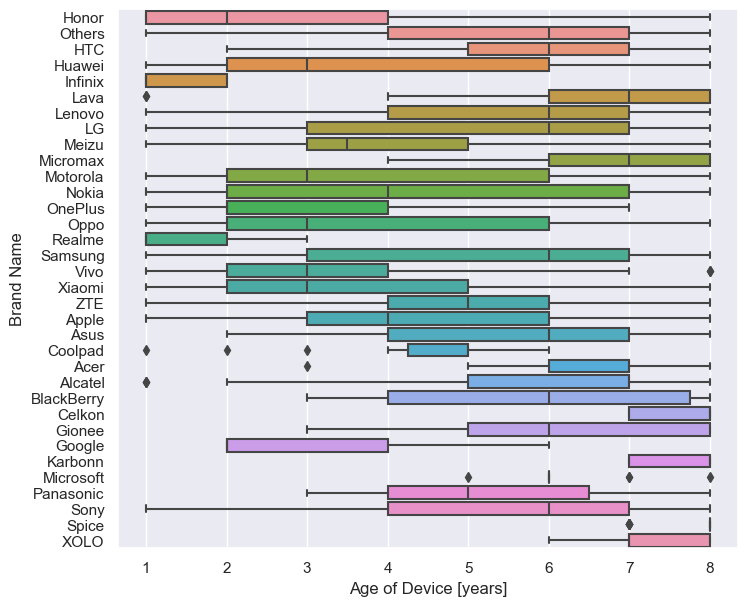

In [428]:
# Boxplot of ages within each brand 
sns.set(rc={"figure.figsize":(8, 7)})
sns.boxplot(data=data, x=df_numvar['age'], y='brand_name')  # 'age' is computed by 2021-release_year
plt.xlabel('Age of Device [years]')
plt.ylabel('Brand Name')
plt.show()

#### Observations
* There are some outliers.
* Some of the youngest devices include RealMe and Infinix.
* Some of the old devices come from Celkon, Karbonn, and XOLO.
* Most brands have a very wide range of ages.

### Insights Based on EDA
* There are 34 unique brand names with the highest inventory being Others, Samsung, and Huawei.
* 93.1% of the used device market is dominated by Android devices. 
* More devices have 4g than 5g and 67% of devices have 4g. Normalized used prices are higher for 4g devices versus devices that do not have 4g.
* Main and selfie camera resolution increased over the years 2013-2018 but then decreased from 2018 to 2020. OnePlus and Sony have some of the highest resolutions in their main cameras compared to other brands. OnePlus and Oppo have higher median resolutions in their selfie cameras compared to the other brands.
* The amount of internal memory decreased over the years 2013-2015 then increased until 2020.
* The amount of RAM increased slowly over the years 2013 to 2018, then it drastically increased from 2018 to 2020. OnePlus has some of the highest RAM as evidenced by 100% of the data being greater than equal to 4 gigabytes which is the median of most brands.
* The number of days used remains fairly steady over the years 2013 to 2016 but then decreased from 2016 to 2020.
* Both new and used prices have increased steadily over the years. The median prices for Apple, Google, and OnePlus are higher than the medians of the other brands and their ranges are concentrated at the higher priced end compared to other brands.
* The battery capacity increased linearly over the years 2013 to 2020.  Furthermore, as the battery capacity increased the weight of the device increased. 
* There are 1099 phones and tablets available from across different brands with screen sizes larger than 6 inches. In general, screen size has increased from 2013-2020.
* The device weight decreased over the years 2013 to 2016 but then steadily increased until 2020. Apple has some of the heaviest devices with a median weight greater than 50% of the weight of all other brands.


## Data Preprocessing

In [429]:
# Create a copy of the data to protect the original data set
df = data.copy()
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Duplicate Value Check

In [430]:
# Print the sum of duplicate values
df.duplicated().sum()

0

#### Observations
* There are no duplicated values.

### Missing Value Treatment

In [431]:
# Print a table of the counts and percentages of missing values
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


#### Observations
* The **main_camera_mp** column has the highest number of missing rows of data.
* **selfie_camera_mp**, **int_memory**, **ram**, **battery**, and **weight** contain <0.3% of missing rows of data.

#### Missing Value Column Distributions Before Imputing

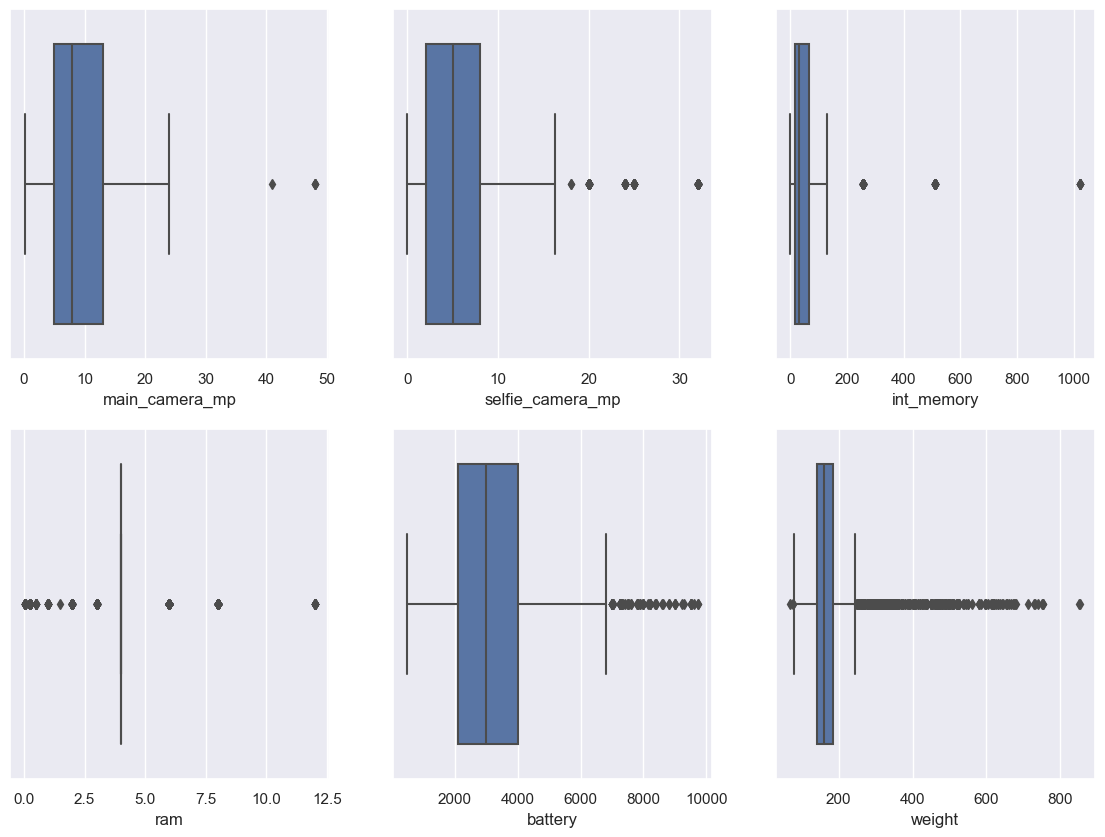

In [432]:
# Define the plot region and figure size
fig, axes = plt.subplots(2, 3, figsize = (14,10))

# Create subplot of each variable with missing values
sns.boxplot(data=df, x='main_camera_mp',   ax=axes[0,0])
sns.boxplot(data=df, x='selfie_camera_mp', ax=axes[0,1])
sns.boxplot(data=df, x='int_memory',       ax=axes[0,2])
sns.boxplot(data=df, x='ram',              ax=axes[1,0])
sns.boxplot(data=df, x='battery',          ax=axes[1,1])
sns.boxplot(data=df, x='weight',           ax=axes[1,2])
plt.show()

#### Imputation of Variables

In [433]:
df.loc[data['main_camera_mp'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


#### Observations
* There are many outliers present in the data so the median will be used to replace missing values.

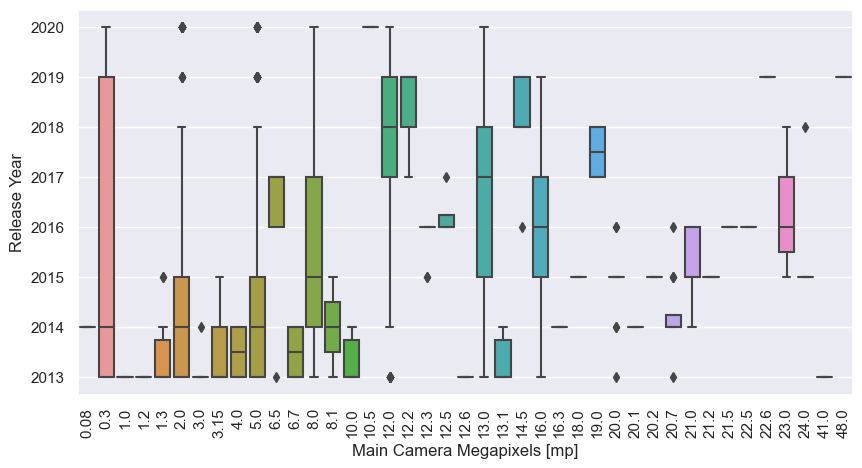

In [434]:
# Plot boxplot comparison of main_camera_mp and release_year
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='main_camera_mp', y='release_year')
plt.xticks(rotation=90)
plt.xlabel('Main Camera Megapixels [mp]')
plt.ylabel('Release Year')
plt.show()

#### Observations
* The **release_year** column shows the median **main_camera_mp** increaseing over the years when plotted against to the **main_camera_mp** so it will be used to group the data to impute the median.

In [435]:
# Impute the missing main_camera_mp values using the median based on release_year
df['main_camera_mp'] = df['main_camera_mp'].fillna(value=df.groupby(['release_year'])['main_camera_mp'].transform('median'))

# Print a table of the counts and percentages of missing values
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


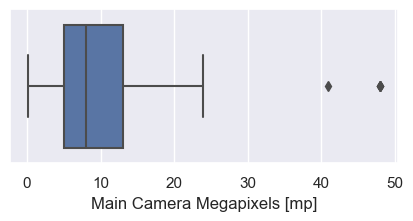

In [436]:
# Plot the main_camera_mp distribution after imputation with the median
plt.figure(figsize=(5, 2))
sns.boxplot(data=df, x='main_camera_mp')
plt.xlabel('Main Camera Megapixels [mp]')
plt.show()

#### Observations
*  Imputing the **main_camera_mp** using the median when grouped with **release_year** did not significantly alter the distribution of this variable.

#### Imputating on Selfie Camera mp, Internal Memory, RAM, Battery, and Weight

In [437]:
df.loc[data['selfie_camera_mp'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


In [438]:
df.loc[data['int_memory'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [439]:
df.loc[data['ram'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [440]:
df.loc[data['battery'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905


In [441]:
df.loc[data['weight'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


#### Observations
* There are only up to 7 values missing in the remaining missing value columns.  Therefore, the median of the column is used.

In [442]:
# Impute the missing main_camera_mp values using the median based on release_year
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(df['selfie_camera_mp'].median())
df['int_memory']       = df['int_memory'].fillna(df['int_memory'].median())
df['ram']              = df['ram'].fillna(df['ram'].median())
df['battery']          = df['battery'].fillna(df['battery'].median())
df['weight']           = df['weight'].fillna(df['weight'].median())

In [443]:
# Check that there are no missing values
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Observations
*  All the missing values have been imputed.

## EDA after Imputing

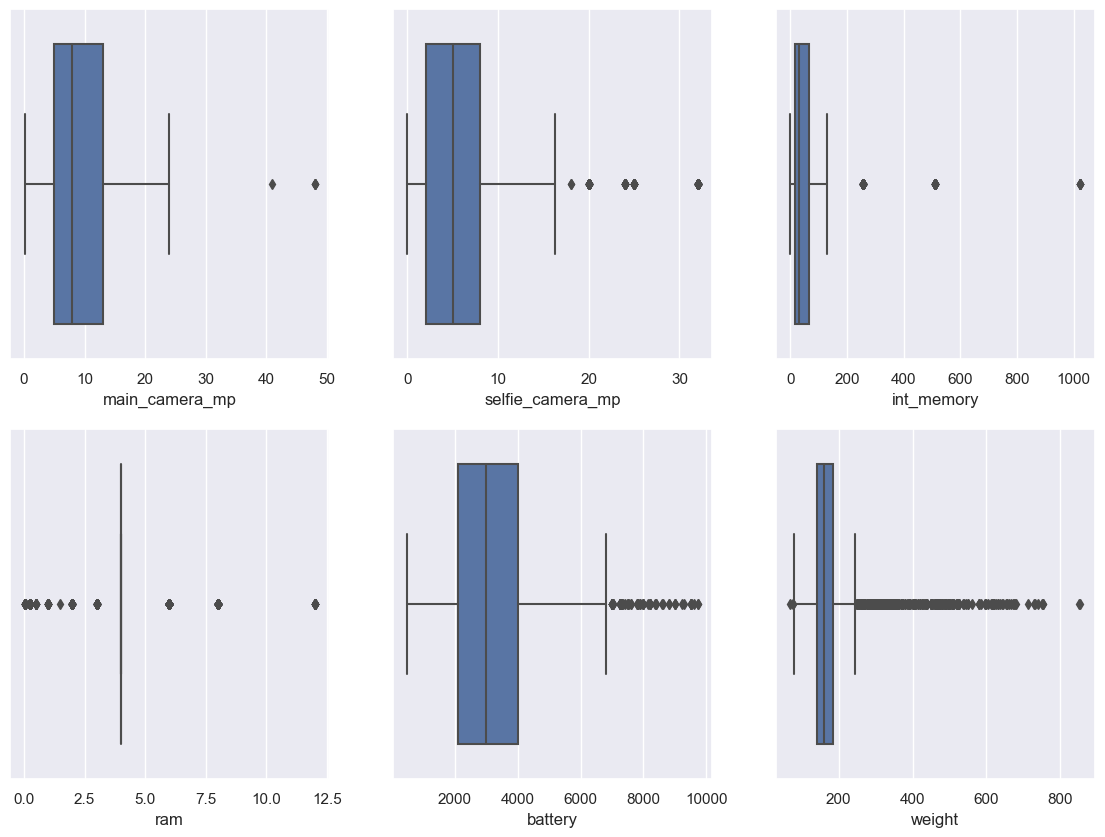

In [444]:
# Define the plot region and figure size
fig, axes = plt.subplots(2, 3, figsize = (14,10))

# Create subplot of each variable
sns.boxplot(data=df, x='main_camera_mp',   ax=axes[0,0])
sns.boxplot(data=df, x='selfie_camera_mp', ax=axes[0,1])
sns.boxplot(data=df, x='int_memory',       ax=axes[0,2])
sns.boxplot(data=df, x='ram',              ax=axes[1,0])
sns.boxplot(data=df, x='battery',          ax=axes[1,1])
sns.boxplot(data=df, x='weight',           ax=axes[1,2])
plt.show()

#### Observations
* There are no significant changes to the distributions of the variables that were imputed.

### Feature Engineering

In [445]:
# Convert release_year to a numerical variable by computing the age of the device
df['device_age'] = 2021-df['release_year']
df['device_age']

0       1
1       1
2       1
3       1
4       1
       ..
3449    2
3450    3
3451    1
3452    1
3453    1
Name: device_age, Length: 3454, dtype: int64

In [446]:
# Drop the release_year column since the age column has been added
df = df.drop('release_year', axis=1)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,device_age
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


#### Observations
* The **release_year** column has been dropped and the **device_age** column has been added.

### Outlier Detection

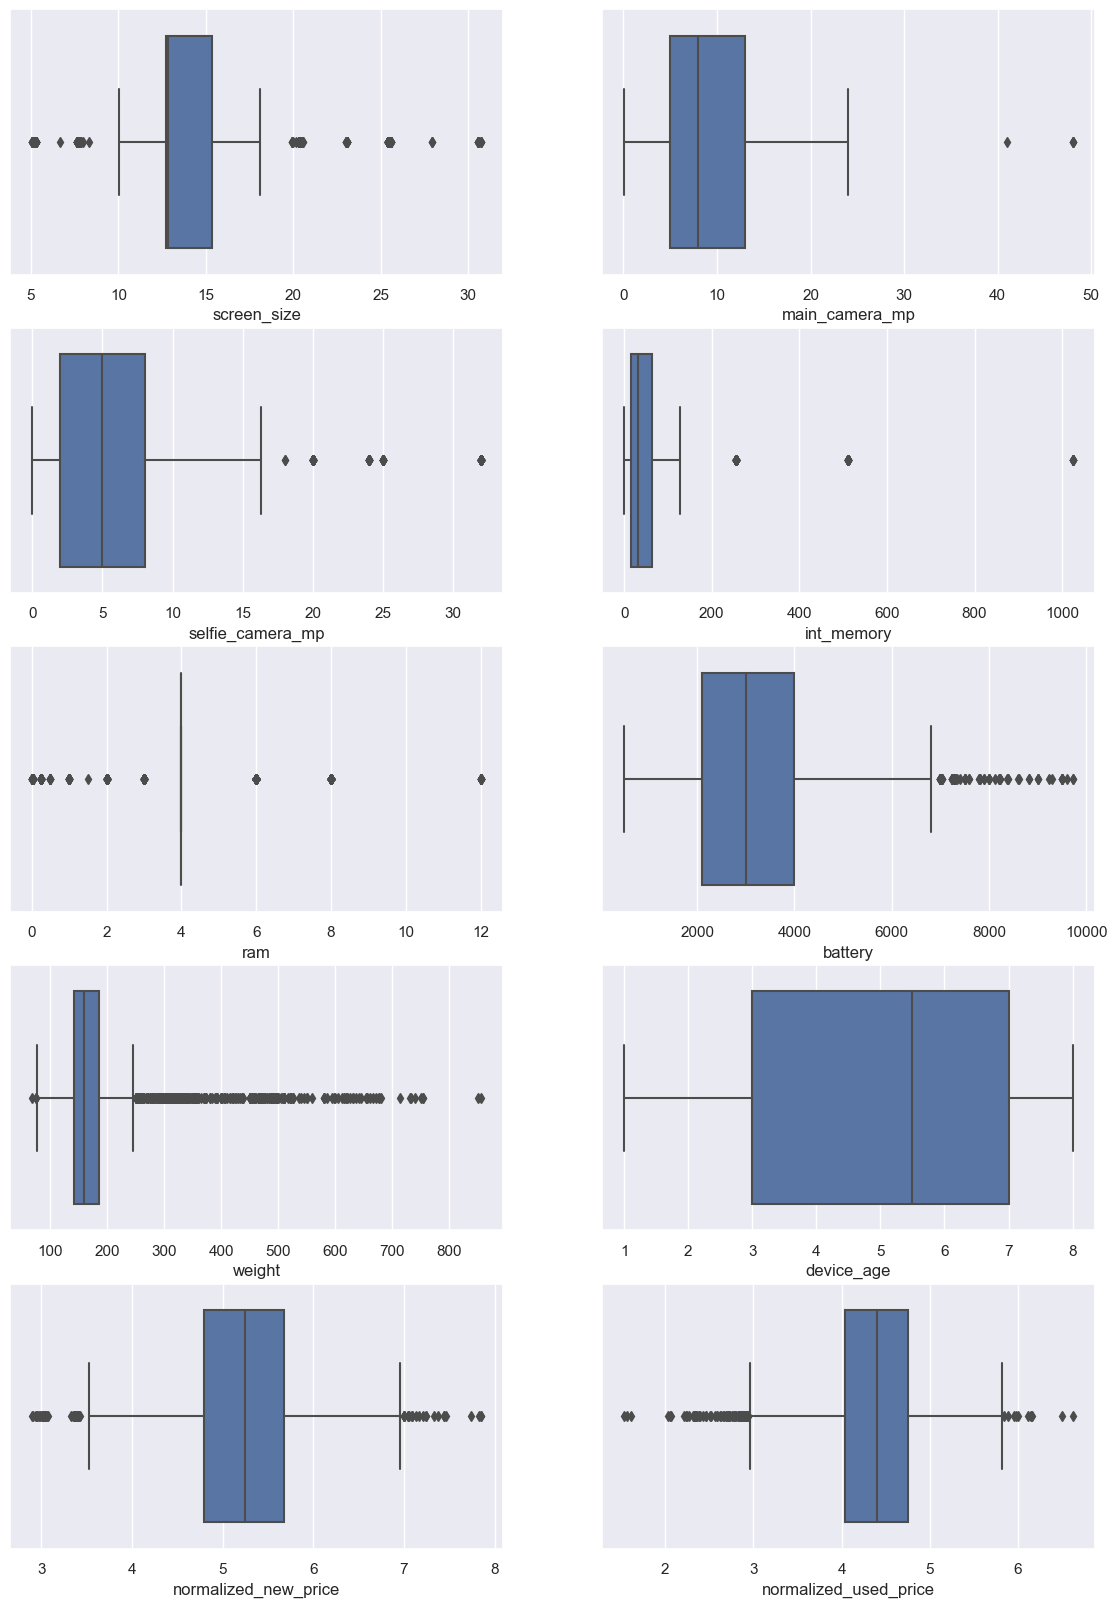

In [447]:
# Define the plot region and figure size
fig, axes = plt.subplots(5, 2 , figsize = (14,20))

# Create subplot of each variable to show outliers
sns.boxplot(data=df, x='screen_size',           ax=axes[0,0])
sns.boxplot(data=df, x='main_camera_mp',        ax=axes[0,1])
sns.boxplot(data=df, x='selfie_camera_mp',      ax=axes[1,0])
sns.boxplot(data=df, x='int_memory',            ax=axes[1,1])
sns.boxplot(data=df, x='ram',                   ax=axes[2,0])
sns.boxplot(data=df, x='battery',               ax=axes[2,1])
sns.boxplot(data=df, x='weight',                ax=axes[3,0])
sns.boxplot(data=df, x='device_age',            ax=axes[3,1])
sns.boxplot(data=df, x='normalized_new_price',  ax=axes[4,0])
sns.boxplot(data=df, x='normalized_used_price', ax=axes[4,1])
plt.show()

### Observations
* There are many outliers in the data.
* These are all genuine and reasonable points so the outliers will not be treated.

### Preparing Data for Modeling

In [481]:
# Split data into independent and dependent variables
X = df.drop(['normalized_used_price'], axis=1)
y = df['normalized_used_price']

# Confirm that independent variables are split
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,device_age
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [482]:
# Confirm the dependent variable is split
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [450]:
# Add a constant to the data
X = sm.add_constant(X)

# Confirm the constant is added
X.head()

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,device_age
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [451]:
# Create the dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True,)

# Confirm the dummy variables have been created
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [452]:
# Split the data to a 70:30 ratio for train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [453]:
# Confirm the split of the data
print('x_train has ' + str(x_train.shape[0]) + ' rows.')
print('y_train has ' + str(y_train.shape[0]) + ' rows.')
print('x_test has '  + str(x_test.shape[0])  + ' rows.')
print('y_test has '  + str(x_test.shape[0])  + ' rows.')

x_train has 2417 rows.
y_train has 2417 rows.
x_test has 1037 rows.
y_test has 1037 rows.


## Model Building - Linear Regression

In [454]:
# Run the OLS model with the data
OLSmodel = sm.OLS(y_train, x_train).fit()
print(OLSmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.3
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           09:01:18   Log-Likelihood:                 122.18
No. Observations:                   2417   AIC:                            -146.4
Df Residuals:                       2368   BIC:                             137.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations
* The **R-squared** value is 0.845 which means that the model is able to explain 84.5% of the variances which is good.
* The **Adjusted R-squared** value is 0.842 which is good.
* The **y-intercept** is 1.3296.

## Model Performance Check

In [483]:
# Predefined functions from scikit.learn: mean_absolute_error, mean_squared_error, r2_score
# Function to compute metrics to evaluate model performance
def model_eval(m, p, t):
    """
    Function to evaluate model performance

    m: linear regression model
    p: independent(predictor) variables
    t: dependent(target) variable
    """

    # Predict with the independent variables
    prediction  = m.predict(p)

    # Compute R squared, adjusted R-squared, RMSE, MAE, and MAPE
    r_sq     = r2_score(t, prediction)                                             # Predefined scikit function for R-squared
    adj_r_sq = 1 - ((1 - r_sq) * (p.shape[0] - 1) / (p.shape[0] - p.shape[1] - 1)) # Adjusted R-squared formula
    RMSE     = np.sqrt(mean_squared_error(t, prediction))                          # Predefined scikit function for MSE
    MAE      = mean_absolute_error(t, prediction)                                  # Predefined scikit function for MAE
    MAPE     = np.mean(np.abs(t - prediction) / t) * 100                           # MAPE formula

    return r_sq, adj_r_sq, RMSE, MAE, MAPE

#### Model Performance Evaluation on Training Set

In [484]:
# Model performance on train set
r_sq_eval, adj_r_sq_eval, RMSE_eval, MAE_eval, MAPE_eval = model_eval(OLSmodel, x_train, y_train)

# Print out results from train set model eval
eval_train = {'R-Sq.': [r_sq_eval], 'Adj. R-Sq.': [adj_r_sq_eval], 'RMSE':[RMSE_eval], 'MAE':[MAE_eval], 'MAPE':[MAPE_eval]}
df_model_perf_train = pd.DataFrame(data=eval_train)
df_model_perf_train

,R-Sq.,Adj. R-Sq.,RMSE,MAE,MAPE
0,0.844671,0.841456,0.230043,0.180509,4.331055


#### Model Performance Evaluation on Testing Set

In [485]:
# Model performance on test set
r_sq_eval, adj_r_sq_eval, RMSE_eval, MAE_eval, MAPE_eval = model_eval(OLSmodel, x_test, y_test)

# Print out results from test set model eval
eval_test = {'R-Sq.': [r_sq_eval], 'Adj. R-Sq.': [adj_r_sq_eval], 'RMSE':[RMSE_eval], 'MAE':[MAE_eval], 'MAPE':[MAPE_eval]}
df_model_perf_test = pd.DataFrame(data=eval_test)
df_model_perf_test

,R-Sq.,Adj. R-Sq.,RMSE,MAE,MAPE
0,0.841493,0.833624,0.239103,0.185078,4.51126


#### Observations
* The training **R-Sq.** is 0.84 so the model is not underfitting.
* The **RMSE** and **MAE** are very close in value and low indicating that the model is not overfitting for the train and test data.
* With a **MAE** of 0.18 the model is able to predict the normalized used price of devices within a mean error of 0.18 on test data.
* **MAPE** of 4.5 means the model is able to predict within 4.5% of the normalized used price of devices on the test data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
    
    * No Multicollinearity

    * Linearity of variables

    * Independence of error terms
    
    * Normality of error terms

    * No Heteroscedasticity

### No Multicollinearity

In [458]:
# Function to compute and return the VIF's for the predictors
def vif_check(x_values):

    # Create a dataframe to hold values
    vif_vals = pd.DataFrame()
    vif_vals['variable'] = x_values.columns

    # Compute VIF for each variable
    vif_vals['VIF'] = [variance_inflation_factor(x_values.values, i) for i in range(len(x_values.columns))]

    return vif_vals

In [459]:
# Call function to check the VIF for each variable
vif_check(x_train)

,variable,VIF
0,const,228.831272
1,screen_size,7.681152
2,main_camera_mp,2.201935
3,selfie_camera_mp,2.813142
4,int_memory,1.361327
5,ram,2.257632
6,battery,4.072300
7,weight,6.386729
8,days_used,2.668010
9,normalized_new_price,3.146100


#### Observations

* VIF 1-5: low multicollinearity.
* VIF 5-10: moderate multicollinearity.
* VIF >10: high multicollinearity.

    * **screen_size** and **weight** are not dummy variables and they have a moderate multicollinearity (VIF 5-10) so the model needs to be rechecked after dropping each one.

In [487]:
# Empty lists to hold data for R-Sq. and RMSE values
adj_r   = []
rmse    = []

def drop_multicoll(x, y, high_vif_var):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    x: independent (predictor) variables
    y: dependent (target) variable
    high_vif_var: variables with high VIF
    """

    # Drop one variable at a time while computing the model and the adj-R2 and RMSE
    for cols in high_vif_var:
        new_train = x.loc[:, ~x.columns.str.startswith(cols)] # new training set
        ols_model = sm.OLS(y, new_train).fit()                # new model
        adj_r.append(ols_model.rsquared_adj)                  # new adj-R-sq. value
        rmse.append(np.sqrt(ols_model.mse_resid))             # new rmse value

    # Create dataframe to hold results
    params = pd.DataFrame({"variable": high_vif_var,"Adj. R-squared": adj_r,"RMSE": rmse,}).sort_values(by="Adj. R-squared", ascending=False)
    params.reset_index(drop=True, inplace=True)

    return params

In [461]:
# Separate the variables (that are not dummy) with VIF >5 to a list
mod_to_high_VIF = ['screen_size', 'weight']

# Compute the adj-r2 and rmse while dropping one variable at a time
adj_r_drop = drop_multicoll(x_train, y_train, mod_to_high_VIF)
adj_r_drop

,variable,Adj. R-squared,RMSE
0,screen_size,0.838185,0.234845
1,weight,0.837912,0.235043


#### Observations
* Since there is little effect on adjusted R-squared after dropping **screen_size** it can be dropped and the VIF factors rechecked.

In [488]:
# Recheck the VIF factors after dropping the screen_size variable
x_train_2 = x_train.drop(['screen_size'], axis=1)
x_test_2  = x_test.drop(['screen_size'],  axis=1)
vif_2     = vif_check(x_train_2)
vif_2

,variable,VIF
0,const,203.777302
1,main_camera_mp,2.198783
2,selfie_camera_mp,2.809743
3,int_memory,1.359231
4,ram,2.257631
5,battery,3.834197
6,weight,2.983931
7,days_used,2.655986
8,normalized_new_price,3.104366
9,device_age,4.722169


#### Observations
* All the variables that are not dummy variables now have a VIF of <5 so the multicollinearity has been handled.

### Model Re-run with Multicollinearity Removed

In [463]:
# Output model with multicollinearity removed and print summary
OLS_mod2 = sm.OLS(y_train, x_train_2).fit()
print(OLS_mod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.3
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           09:01:18   Log-Likelihood:                 96.485
No. Observations:                   2417   AIC:                            -96.97
Df Residuals:                       2369   BIC:                             181.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations
* There was little effect on the adjusted R-squared value from the model run with the multicollinearity present (adj. $R^2$ = 0.842) to the model run with the multicollinearity removed (adj. $R^2$ = 0.838).
* Next, the p-values need to be evaluated.

### High p-value Variables

Let $\beta_i$ be the coefficient of the i$^{th}$ independent variable then the null hypothesis and alternative hypothesis are:

>$H_0$: Independent variable is not significant ($\beta_i = 0$)
    
>$H_a$: Independent variable is significant ($\beta_i\neq 0$)

In the model output (P>|t|) gives the p-value for each independent variable.
Let $\alpha = 0.05$ as the level of significance (95% confidence interval).

#### Observations
*  All the p-values for the dummy variable column **brand_name** are >0.05 so the entire column can be dropped.

In [489]:
# Drop the dummy variable brand_name column
col_drop  = 'brand_name'
x_train_3 = x_train_2.loc[:, ~x_train_2.columns.str.startswith(col_drop)]
x_test_3  = x_test_2.loc[:,  ~x_test_2.columns.str.startswith(col_drop)]

# Confirm the brand_name column has been removed from the dataset
x_train_3.head()

,const,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,device_age,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,7,0,0,0,0,0
1525,1.0,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,5,0,0,0,1,0
1128,1.0,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,6,0,0,0,0,0
3003,1.0,8.0,5.0,16.0,4.0,3200.0,160.0,800,5.189228,6,0,0,0,1,0
2907,1.0,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,4,0,0,0,1,0


### Iterate to Remove Statistically Insignificant (p>0.05) Variables

In [491]:
def remove_p(x_pval, max_pval):
    """
    Iterate to remove high p-values by building the model, dropping the highest p-value variable,
    re-running the model with the dropped variable, and dropping the column with the highest p-value.
    Repeat this process until no columns are retained that have p>0.05.

    x_pval: independent (predictor) variables
    max_pval: maximum p-value
    """

    # Convert variable names to a list
    cols_pval = x_pval.columns.tolist()

    # While-loop through to build model, check for max pvalue, and remove variable if >0.05
    while len(x_pval) > 0:
        train_set  = x_pval[cols_pval]                # declare train set
        model_pval = sm.OLS(y_train, train_set).fit() # model run
        max_pval   = max(model_pval.pvalues)          # get max p-value
        var_p_max  = model_pval.pvalues.idxmax()      # variable index with max p-value

        if max_pval > 0.05:
            cols_pval.remove(var_p_max) # remove variable if p-value >0.05
        else:
            break

    keep_vars = cols_pval # variables to keep

    return keep_vars

In [466]:
# Copy the most recent training set to protect the data
x_pval_train = x_train_3.copy()

# Iterate to remove high p-values
retained_vars = remove_p(x_pval_train, 1)

# Print the varibles to retain
retained_vars

['const',
 'main_camera_mp',
 'selfie_camera_mp',
 'ram',
 'weight',
 'normalized_new_price',
 'device_age',
 'os_Others',
 '4g_yes']

In [467]:
# Separate new train and test sets with retained variables (high p-values removed)
x_train_final = x_train_3[retained_vars]
x_test_final  = x_test_3[retained_vars]

# Confirm the variables are retained
x_train_final.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight,normalized_new_price,device_age,os_Others,4g_yes
3026,1.0,8.0,0.3,4.0,120.0,4.796204,7,0,0
1525,1.0,13.0,5.0,4.0,225.0,5.434595,5,0,1
1128,1.0,13.0,5.0,4.0,162.0,5.137914,6,0,0
3003,1.0,8.0,5.0,4.0,160.0,5.189228,6,0,1
2907,1.0,13.0,16.0,4.0,160.0,5.016220,4,0,1


### Re-run the model to confirm all variables are statistically significant

In [468]:
OLSmodel_final = sm.OLS(y_train, x_train_final).fit()
print(OLSmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1546.
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           09:01:19   Log-Likelihood:                 64.371
No. Observations:                   2417   AIC:                            -110.7
Df Residuals:                       2408   BIC:                            -58.63
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations
* All the variables are now statistically significant (p<0.05).

### Check Model Performance

In [492]:
# Model performance on train set
r_sq_eval, adj_r_sq_eval, RMSE_eval, MAE_eval, MAPE_eval = model_eval(OLSmodel_final, x_train_final, y_train)

# Print out results from train set model eval
eval_test = {'R-Sq.': [r_sq_eval], 'Adj. R-Sq.': [adj_r_sq_eval], 'RMSE':[RMSE_eval], 'MAE':[MAE_eval], 'MAPE':[MAPE_eval]}
df_model_perf_test = pd.DataFrame(data=eval_test)
df_model_perf_test

,R-Sq.,Adj. R-Sq.,RMSE,MAE,MAPE
0,0.83706,0.836451,0.235612,0.184456,4.434504


In [493]:
# Model performance on test set
r_sq_eval, adj_r_sq_eval, RMSE_eval, MAE_eval, MAPE_eval = model_eval(OLSmodel_final, x_test_final, y_test)

# Print out results from test set model eval
eval_test = {'R-Sq.': [r_sq_eval], 'Adj. R-Sq.': [adj_r_sq_eval], 'RMSE':[RMSE_eval], 'MAE':[MAE_eval], 'MAPE':[MAPE_eval]}
df_model_perf_test = pd.DataFrame(data=eval_test)
df_model_perf_test

,R-Sq.,Adj. R-Sq.,RMSE,MAE,MAPE
0,0.838891,0.83748,0.241057,0.186131,4.546031


#### Observations
* The training **R-Sq.** is 0.83 so the model is not underfitting.
* The **RMSE** and **MAE** are similar and low indicating that the model is not overfitting for the train and test data.
* With a **MAE** of 0.18 the model is able to predict the normalized used price of devices within a mean error of 0.18 on test data.
* **MAPE** of 4.5 means the model is able to predict within 4.5% of the normalized used price of devices on the test data.

### Test for Linearity and Independence

In [471]:
# Create dataframe to hold values
df_lin_ind = pd.DataFrame()

# Insert values into corret columns
df_lin_ind['Actual Values']   = y_train                      # dependent variable
df_lin_ind['Modeled Values']  = OLSmodel_final.fittedvalues  # modeled values
df_lin_ind['Residual Errors'] = OLSmodel_final.resid         # residual errors

# Print values to confirm dataframe
df_lin_ind.head()

,Actual Values,Modeled Values,Residual Errors
3026,4.087488,3.867563,0.219925
1525,4.448399,4.596143,-0.147744
1128,4.315353,4.289358,0.025994
3003,4.282068,4.245492,0.036576
2907,4.456438,4.500594,-0.044156


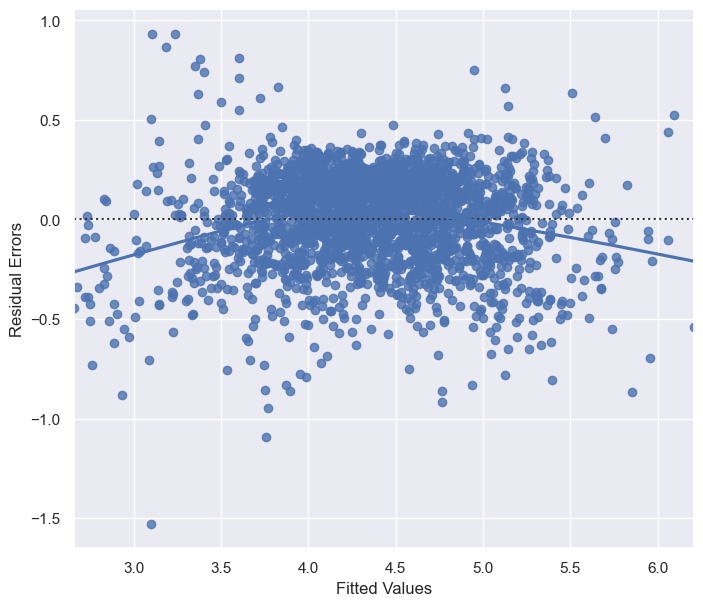

In [472]:
# Plot to evaluate linearity and independence of the model
sns.residplot(data=df_lin_ind, x='Modeled Values', y='Residual Errors', lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residual Errors')
plt.show()

#### Observations
* Since there is no pattern in the plot the linearity and independence assumption of the model is satisfied.

### Test for Normality

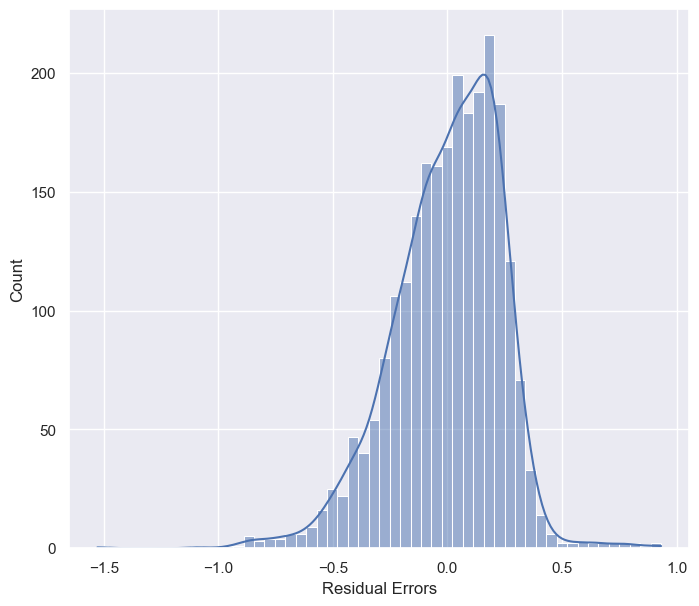

In [473]:
# Histogram plot of residual errors
sns.histplot(data=df_lin_ind, x='Residual Errors', kde=True)
plt.show()

#### Observations
* The histogram plot of the residual errors shows a bell-shaped curve.

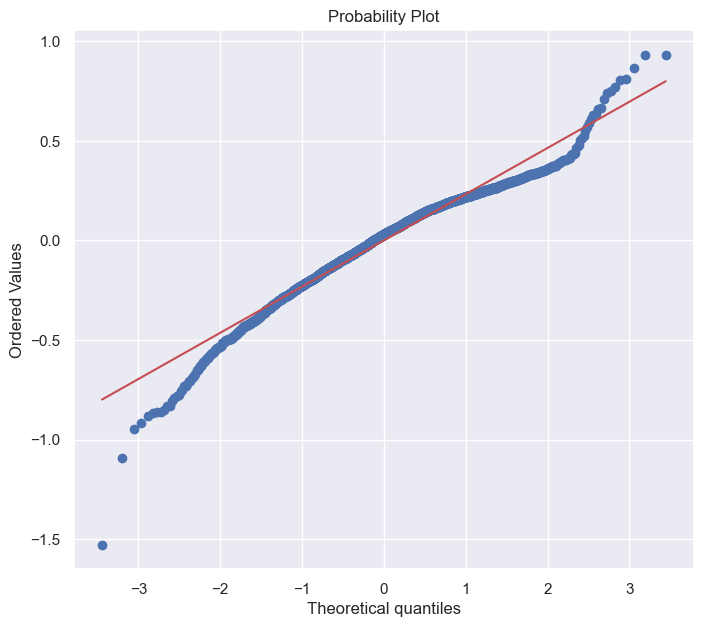

In [474]:
# Q-Q plot of the residual errors
stats.probplot(df_lin_ind['Residual Errors'], dist="norm", plot=pylab)
plt.show()

#### Observations
* Most of the points fall on or near a straight line with the exception of the tails.

In [475]:
# Shapiro-Wilk Test for Normality
stats.shapiro(df_lin_ind['Residual Errors'])

ShapiroResult(statistic=0.9680095911026001, pvalue=8.942411101260141e-23)

#### Observations
* Per the Shapiro-Wilk Test the distribution is not normal since p<0.05.  
* However, the plotted distribution is approximately normal so the assumption is met.

### Test for Homoscedasticity

In [476]:
# Test for homoscedasticity
values     = ['F statistic', 'p-value']
GFQ_test   = sms.het_goldfeldquandt(df_lin_ind['Residual Errors'], x_train_final)
lzip(values, GFQ_test)

[('F statistic', 1.0278270217383116), ('p-value', 0.3173231600099132)]

#### Observations
* The p-value for the Goldfeldquandt Test was 0.31 which is >0.05 so the assumption is satisfied and the resiudals are homoscedastic.

### Predictions on Data

In [477]:
# Prediction on the test set
pred_final = OLSmodel_final.predict(x_test_final)

# Data frame to hold actual and predicted values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': pred_final})
df_pred.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.386689
2341,3.696103,4.003294
1913,3.592093,3.645587
688,4.306495,4.096242
650,4.522115,5.176667
2291,4.259294,4.392686
40,4.997685,5.451396
1884,3.875359,4.052959
2538,4.206631,4.062909
45,5.380450,5.285803


#### Observations
* The model has done pretty well in predicting the values.

## Final Model

In [478]:
# Reprint results of final model
OLSmodel_final = sm.OLS(y_train, x_train_final).fit()
print(OLSmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1546.
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           09:01:21   Log-Likelihood:                 64.371
No. Observations:                   2417   AIC:                            -110.7
Df Residuals:                       2408   BIC:                            -58.63
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [479]:
# Model performance on train set
r_sq_eval, adj_r_sq_eval, RMSE_eval, MAE_eval, MAPE_eval = model_eval(OLSmodel_final, x_train_final, y_train)

# Print out results from final model preformance evaluation on training data
eval_test = {'R-Sq.': [r_sq_eval], 'Adj. R-Sq.': [adj_r_sq_eval], 'RMSE':[RMSE_eval], 'MAE':[MAE_eval], 'MAPE':[MAPE_eval]}
df_model_perf_test = pd.DataFrame(data=eval_test)
df_model_perf_test

,R-Sq.,Adj. R-Sq.,RMSE,MAE,MAPE
0,0.83706,0.836451,0.235612,0.184456,4.434504


In [480]:
# Model performance on test set
r_sq_eval, adj_r_sq_eval, RMSE_eval, MAE_eval, MAPE_eval = model_eval(OLSmodel_final, x_test_final, y_test)

# Print out results from final model perforamance evaluation on test data
eval_test = {'R-Sq.': [r_sq_eval], 'Adj. R-Sq.': [adj_r_sq_eval], 'RMSE':[RMSE_eval], 'MAE':[MAE_eval], 'MAPE':[MAPE_eval]}
df_model_perf_test = pd.DataFrame(data=eval_test)
df_model_perf_test

,R-Sq.,Adj. R-Sq.,RMSE,MAE,MAPE
0,0.838891,0.83748,0.241057,0.186131,4.546031


#### Observations
* The model is able to explain ~84% of the variation in the data.
* **RMSE** and **MAE** for train and test indicate the model is not overfitting since they are low and similar.
* With a MAE of 0.18 the model is able to predict the normalized used price of devices within a mean error of 0.18 on test data.
* The MAPE on the test set suggests the model is able to predict within 4.5% of the normalized used price.
* Based on these observations, the model *OLSmodel_final* is suitable for prediction and inference.

## Actionable Insights and Recommendations

**Model Reiliability**
* The OLS model is able to explain ~84% of the variation in the data and within 4.5% of the normalized used price on the test data indicating that the model is suitable for prediction and inference.
* The train and test RMSE and MAE are similar and low which indicates that the model is not overfitting.
* The predictors in the final model are statisticaly significant since their p-values are less than 0.05 (95% confidence interval). 

**Model Insights**:
  * The normalized used price for the *operating system designated as Others* was 0.1429 units less than other operating systems (e.g., Android, iOS, Windows), all other variables held constant.
  * If the *weight in grams* of the device increases by one unit, then it's normalized used price increases by 0.0017 units, all other variables held constant.
  * If the number of *megapixels of the selfie camera* increases by one unit, then it's normalized used price increases by 0.0146 units, all other variables held constant.
  * If the number of *megapixels of the main camera* increases by one unit, then it's normalized used price increases by 0.0214 units, all other variables held constant.
  * If the number of *gigabytes of RAM* increases by one unit, then it's normalized used price increases by 0.0207 units, all other variables held constant.
  * If the *age of the device* (variable computed using the year the data was collected minus release year of the device) increases by one unit, then it's normalized used price decreases by 0.0308 units, all other variables held constant.
  * The normalized used price for *4g* was 0.0447 units more than those without 4g, all other variables held constant.
  * If the *normalized new price* increases by one unit, then it's normalized used price increases by 0.4259 units, all other variables held constant.
  
**Recommendations to ReCell**:
  * The weight of the device increases the normalized used price so the company should aim to buy devices that weigh more to resell such as Apple.
  * The company should focus on buying devices that contain more megapixels in their main and selfie cameras because this increases the value of the used devices, therefore increasing their profits when they resell.  For example, the brand OnePlus had the highest resolution in the main and selfie cameras.
  * The number of gigabytes [GB] of RAM also increases the value of the device since an increase in RAM results in an increasing in the normalized used price.  Therefore, the company should focus on buying devices that have a higher number of GB of RAM.  The brand that showed the highest RAM was OnePlus where 100% of the devices from OnePlus have RAM of 4 GB or higher.  The median for most brands was 4 GB of RAM.
  * Since the normalized used price decreased with an increasing age of the device, then the company should look into buying and reselling more phones that have a younger age or have been released at a later date such as RealMe and Infinix.
  * ReCell should promote the buying of 4g devices because used price increases with an increase in 4g devices, the company can look to add more 4g devices in their sales.
  * **Of all the variables in the model the normalized new price had highest per unit increase in the normalized used price. This variable had the biggest impact on normalized used price.**
  * **From this data set it was determined that Apple, Google, and OnePlus brands all sell for a higher new price.  However, OnePlus, Google, and Apple were among the lowest in stock inventory. Therefore, ReCell should aim their marketing strategies to promote users to sell their used OnePlus, Google, and Apple devices to ReCell so that ReCell can increase their inventory in these brands and increase their profits.**
  
**Future Studies**
  * Recell should gather additional data to determine what devices are selling at the highest prices on the market to inform which device brands they should promote users to sell to the company.  The variable of normalized new price showed to be the most influential by the model on used price and needs to be explored further. 

### Citations
$^1$ Hinkle DE, Wiersma W, Jurs SG.  *Applied Statistics for the Behavioral Sciences*. 5th ed. Boston: Houghton Mifflin, 2003.

___